# Medical Cost Insurance|Intern Name- Sudhanshu Kumar Singh|Submission Date 09/09/2023

# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("D:\sks\Flip_Robo_techonology _project\Project_discussion\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#number of rows and columns 
df.shape

(1338, 7)

In [5]:
# Information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#In dataset sex,smoker and region are catogrial coloumns.

In [6]:
#checking missing value 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#fist 5 row of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#Statistical Description
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#Age distribution 

In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [12]:
df.shape

(1338, 7)

In [13]:
#Converted cotegorical data to numbrical data 
clean_df = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_df, inplace=True)

In [14]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# Statistical Description

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


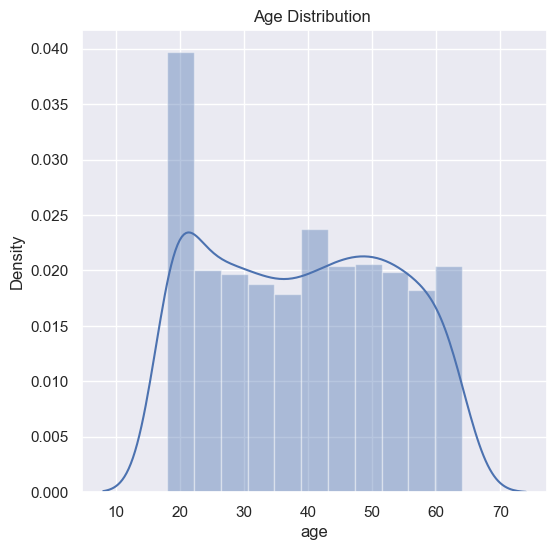

In [22]:
#Age distribution 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution ')
plt.show()

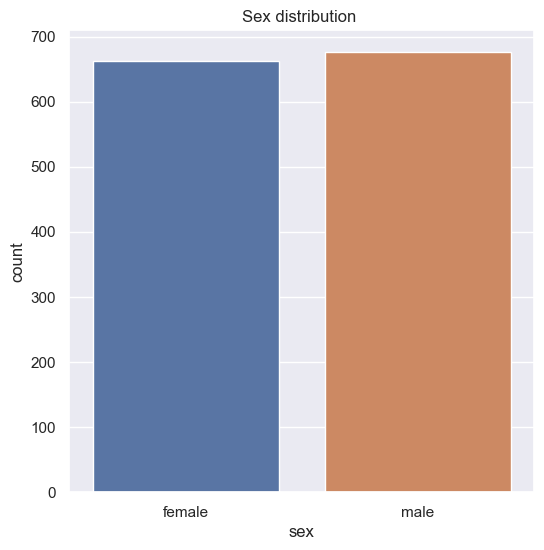

In [23]:
#Gender Column
sns.set() 
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex distribution ')
plt.show()

In [24]:
df['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

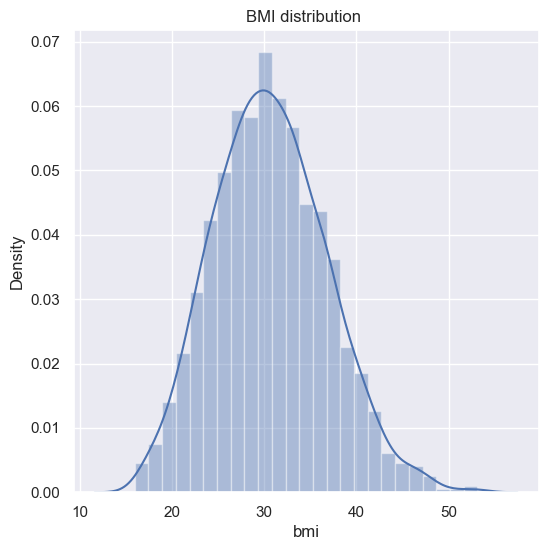

In [25]:
#BMI distribution in our dataset
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI distribution ')
plt.show()

Normal BMI range ---> 18.5 to 24.9.In above distribution BMI graph people.
More number of data is comming under 25 to 40 range.Means under weight or over weight.It can incrase effect the insurance  cost, people get.

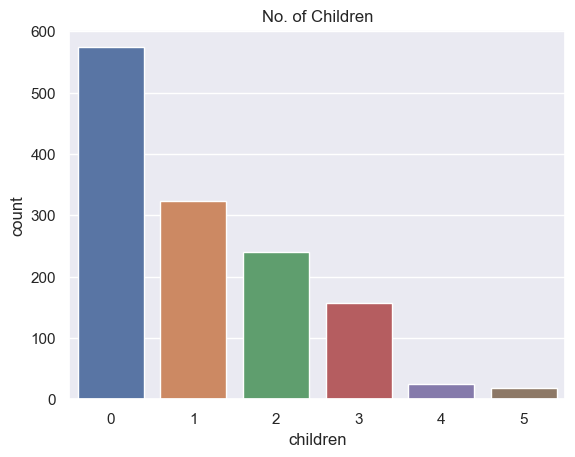

In [27]:
#Number of childrens
sns.set()
sns.countplot(x='children',data=df)
plt.title('No. of Children')
plt.show()

In [ ]:
df['children'].value_counts()


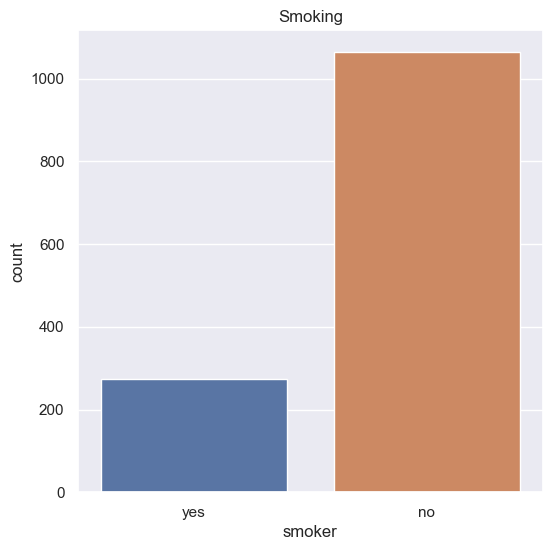

In [28]:
# Smokers Visualisaiton 
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoking')
plt.show()

In [29]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

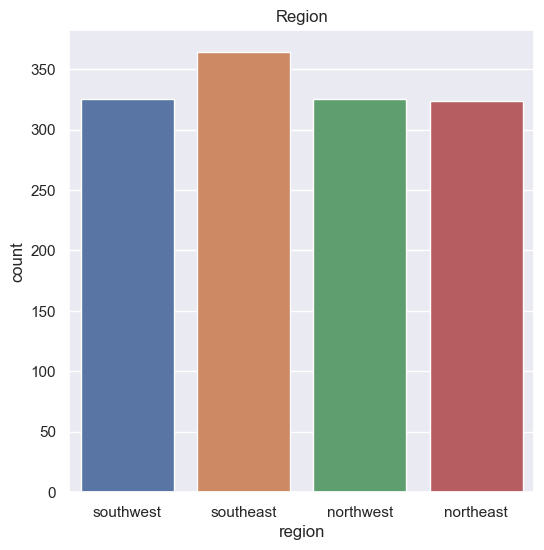

In [30]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [31]:
df['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

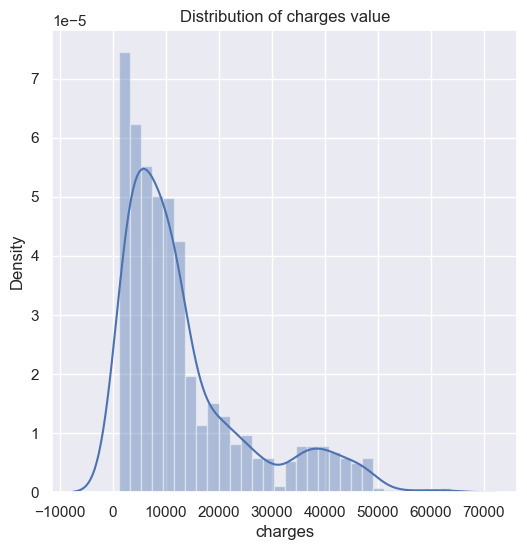

In [32]:
#distribution of charges value 
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Distribution of charges value')
plt.show()

In [33]:
#Change the Catogrical Features to Numbric 

#changing the sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

#changing the region column
df.replace({'region':{'southwest':0,'southeast':1,'northeast':2,"northwest":3}}, inplace=True)
            
#changing the smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)              

In [34]:
# Splitting the features and target
X = df.drop(columns='charges',axis=1)
Y  = df['charges']

In [35]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [36]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [37]:
# Train test data 

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Preperation

In [40]:
# loading the Linear Regression model
regressor= LinearRegression()

In [41]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [42]:
#Prediction of training data 
training_data_prediction = regressor.predict(X_train)


In [43]:
# R squared value 
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.7516346664929345


In [44]:
# prediciting the test data
test_data_predicition = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_predicition)

In [45]:
print(r2_test)

0.7441032539760071


In [46]:
#Predective System
input_data = (37,1,30.8,2,1,0)

#chaning it to numpy array
input_data_as_array = np.asarray(input_data)

#reshapping the data
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print("The person will get insurance money = ",prediction[0])

The person will get insurance money =  8050.198206802932
